<a href="https://colab.research.google.com/github/abdullah-maharmeh/Olympic-Insights-120-Years-of-Athletes-and-Results/blob/main/EDA_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to our EDA project, where we'll take a fascinating journey through the history of the Olympic games and explore how global events have impacted this momentous occasion. Along the way, we'll uncover some interesting insights, including:

A concise overview of the history of the Olympic games
The reasons behind fluctuations in the number of participants over the years
An examination of the circumstances that led to previous cancellations of the games
Political boycotts by countries that have impacted the games in the past
An evaluation of the performance of Arab athletes in the Olympics
In this notebook, we have gathered data from Kaggle's "120 years of Olympic history: athletes and results" as two CSV files, which we have merged into a single data frame. We have used Python libraries such as Pandas, NumPy, Seaborn, and Matplotlib to analyze and preprocess the data, and draw meaningful insights.
#### this is my first EDA project so I hope to hear from you about it!

Importing Staements

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
from google.colab import files

We have 2 csv files we want to get data from them .. 
so lets get the data 

In [3]:
olympic = pd.read_csv('/content/athlete_events.csv')
region = pd.read_csv('/content/noc_regions.csv') 

we must take a look on the dataframes 

In [4]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
olympic.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [9]:
region.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


# Data cleaning and preprocessing

When we look at the head of the Olympic data frame we can find out the column "Games" has expanded into two columns "Season" and "Year", so I prefer to drop this column from my data frame.

We can also see that we have null values in multiple columns in the Olympic data frame, "Age" "Weight" and "Hight" these columns must have values in each record so we want to deal with this issue.
The "Medal" column usually has null values because not all the participants can win a medal.  


we have only the year when each Olympic game is held, I want to try to get the all date of them .

We can see some null values in region column we want to see why it's null and if we can have a good way to deal with that or accept that null values 

In [10]:
mask = region.region.isnull()
region[mask]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


so we have three values without region let's talk about them 🐾

1- **ROT** :- The Refugee Olympic Team (ROT) is a team of refugee athletes, and as such, it does not represent any specific country or region. The team is composed of athletes who have been displaced from their home countries due to conflict, war, or persecution and are unable to compete for their original countries. so we can't fill it manually and we accept it .

2- **TUV** :- Tuvalu is a small island nation located in the Pacific Ocean. It is one of the smallest countries in the world in terms of land area and population, we can said that it's reagion is :- central Pacific Ocean

3-**UNK** :-we have 2 competitors with these NOC, when I search about them I just found that they are considered from Unknown nations. you can read more  [here](https://www.olympedia.org/countries/UNK/editions/6)


In [11]:
region.iloc[208]['region']='Central Paicific'


Lt's drop the Games column 

In [12]:
olympic.drop('Games',inplace=True,axis=1)

**Merging two data frames into one **

In [13]:
oly = pd.merge(left=olympic,right=region,on='NOC',how='left')
oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


we want to make the columns name consistent

In [14]:
oly.rename(columns={'region':'Region','notes':'Notes'},inplace=True)

In [15]:
oly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
 14  Region  270753 non-null  object 
 15  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.2+ MB


Let's check the if there is a duplicate values in The DataFrame 

In [16]:
if oly.duplicated().any():
  print("Ther's a duplicate values =",oly.duplicated().sum())
else:
  print("There isn't dupblcated values ")

Ther's a duplicate values = 1385


we have 1385 duplicated values in all columns .

**Let's drop it **

In [17]:
oly.drop_duplicates(inplace=True)

In [18]:
if oly.duplicated().any():
  print("Ther's a duplicate values =",oly.duplicated().sum())
else:
  print("There isn't dupblcated values ")

There isn't dupblcated values 


Let's try to deal with nan value in the data frame
I want to create function that randomly fill the null values with the (mean or median , or 25/75 percental of each sport . 

In [19]:
#first, we will separate the Males from females because they have different measurements in weight and height
fem = oly[oly['Sex']=='F']
mal = oly[oly['Sex']=='M']

In [20]:
fsport = list(fem.Sport.unique())
msport = list(mal.Sport.unique())


Let's check the distribution of Age and Height and white to determine the best way to fill nan values

(array([3.1000e+01, 4.7300e+02, 2.3930e+03, 1.1644e+04, 2.3875e+04,
        2.1929e+04, 6.0160e+03, 9.0400e+02, 1.0700e+02, 6.0000e+00]),
 array([127. , 135.6, 144.2, 152.8, 161.4, 170. , 178.6, 187.2, 195.8,
        204.4, 213. ]),
 <BarContainer object of 10 artists>)

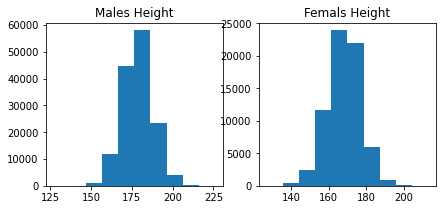

In [21]:
fig, ax = plt.subplots(1,2,figsize=(7,3))
ax[0].hist(mal['Height'])
ax[0].set_title('Males Height')
ax[1].set_title('Femals Height')
ax[1].hist(fem['Height'])

(array([9.3360e+03, 2.9760e+04, 2.4661e+04, 8.4950e+03, 1.1700e+03,
        3.3400e+02, 1.5500e+02, 3.1000e+01, 2.1000e+01, 1.3000e+01]),
 array([11. , 17.3, 23.6, 29.9, 36.2, 42.5, 48.8, 55.1, 61.4, 67.7, 74. ]),
 <BarContainer object of 10 artists>)

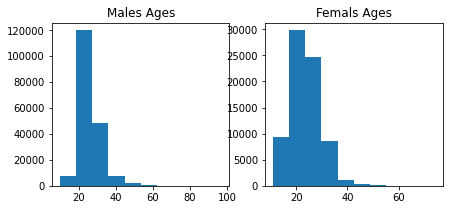

In [22]:
fig, ax = plt.subplots(1,2,figsize=(7,3))
ax[0].hist(mal['Age'])
ax[0].set_title('Males Ages')
ax[1].set_title('Femals Ages')
ax[1].hist(fem['Age'])

(array([1.0370e+03, 1.5061e+04, 3.7517e+04, 1.1486e+04, 1.3020e+03,
        2.3400e+02, 8.0000e+01, 4.0000e+01, 9.0000e+00, 5.0000e+00]),
 array([ 25. ,  39.2,  53.4,  67.6,  81.8,  96. , 110.2, 124.4, 138.6,
        152.8, 167. ]),
 <BarContainer object of 10 artists>)

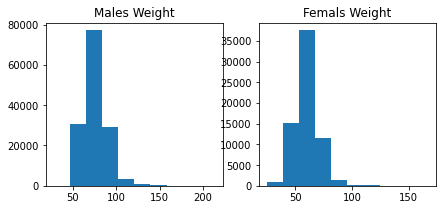

In [23]:
fig, ax = plt.subplots(1,2,figsize=(7,3))
ax[0].hist(mal['Weight'])
ax[0].set_title('Males Weight')
ax[1].set_title('Femals Weight')
ax[1].hist(fem['Weight'])

we can see that these features are roughly symmetrical and not heavily skewed , so we can apply the median or mean method to fill the nan values with it .

To be more accurate in this operation I will use the list of sports that  we made before to take better values for the nan values in each sport because some sports need tall people, so you can see the average is higher than other sports that play with short people.

I will made a function to fill the values in each sport .

let's build fuction to deal with Height

In [24]:
mal.Age.median()

25.0

In [25]:
def heig(df, li,num):
    for i in li:
        if df[df['Sport'] == i]['Height'].isnull().all(): # check if all values are NaN
            if num == 1:
              m = 179
            else:
              m=168
            #make it 168 when you run for women , men 179
        else:
            m = df[df['Sport'] == i]['Height'].median() # calculate median for non-empty column
        df.loc[df['Sport'] == i, 'Height'] = df.loc[df['Sport'] == i, 'Height'].fillna(m)

In [26]:
def Weigh(df, li,num):
    for i in li:
        if df[df['Sport'] == i]['Weight'].isnull().all(): # check if all values are NaN
            if num == 1:
              m = 74
            else:
              m= 59
            #make it 59 when run for women, men 74
        else:
            m = df[df['Sport'] == i]['Weight'].median() # calculate median for non-empty column
        df.loc[df['Sport'] == i, 'Weight'] = df.loc[df['Sport'] == i, 'Weight'].fillna(m)

In [27]:
def age(df, li,num):
    for i in li:
        if df[df['Sport'] == i]['Age'].isnull().all(): # check if all values are NaN
            if num == 1:
              m = 25
            else:
              m=23
            #make it 23 when run for women dataframe , men 25
        else:
            m = df[df['Sport'] == i]['Age'].median() # calculate median for non-empty column
        df.loc[df['Sport'] == i, 'Age'] = df.loc[df['Sport'] == i, 'Age'].fillna(m)

Male edit

In [28]:
heig(mal,msport,1)
age(mal,msport,1)
Weigh(mal,msport,1)


Femal edit

In [29]:
heig(fem,fsport,2)
age(fem,fsport,2)
Weigh(fem,fsport,2)

In [30]:
mal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195353 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      195353 non-null  int64  
 1   Name    195353 non-null  object 
 2   Sex     195353 non-null  object 
 3   Age     195353 non-null  float64
 4   Height  195353 non-null  float64
 5   Weight  195353 non-null  float64
 6   Team    195353 non-null  object 
 7   NOC     195353 non-null  object 
 8   Year    195353 non-null  int64  
 9   Season  195353 non-null  object 
 10  City    195353 non-null  object 
 11  Sport   195353 non-null  object 
 12  Event   195353 non-null  object 
 13  Medal   28519 non-null   object 
 14  Region  195124 non-null  object 
 15  Notes   4134 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 25.3+ MB


In [31]:
fem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74378 entries, 4 to 271110
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74378 non-null  int64  
 1   Name    74378 non-null  object 
 2   Sex     74378 non-null  object 
 3   Age     74378 non-null  float64
 4   Height  74378 non-null  float64
 5   Weight  74378 non-null  float64
 6   Team    74378 non-null  object 
 7   NOC     74378 non-null  object 
 8   Year    74378 non-null  int64  
 9   Season  74378 non-null  object 
 10  City    74378 non-null  object 
 11  Sport   74378 non-null  object 
 12  Event   74378 non-null  object 
 13  Medal   11253 non-null  object 
 14  Region  74244 non-null  object 
 15  Notes   901 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 9.6+ MB


we can see that we handle the missing values in our dataset, and we don't have other missing values except in the note and medal columns.⚓ 

In [32]:
#Merge to the original dataset 
oly = pd.concat([mal,fem])

In [33]:
oly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271110
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  float64
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Year    269731 non-null  int64  
 9   Season  269731 non-null  object 
 10  City    269731 non-null  object 
 11  Sport   269731 non-null  object 
 12  Event   269731 non-null  object 
 13  Medal   39772 non-null   object 
 14  Region  269368 non-null  object 
 15  Notes   5035 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.0+ MB


# Let's Discover interesting things !!!


## Historical Overview 

In [34]:
oly.Year.unique()

array([1992, 2012, 1920, 1900, 1994, 2002, 1952, 1980, 2000, 1912, 1924,
       2014, 1948, 1998, 2006, 2004, 1960, 1964, 1984, 1968, 1972, 1996,
       1936, 1956, 1928, 2016, 1976, 1988, 2008, 2010, 1906, 1904, 1932,
       1908, 1896])

In [35]:
g = oly.groupby('Season')
summer_oly = g.get_group('Summer')
winter_oly = g.get_group('Winter')

In [36]:
grouped = summer_oly.groupby('Year')['ID'].nunique().reset_index(name='count')
groupedw = winter_oly.groupby('Year')['ID'].nunique().reset_index(name='count')

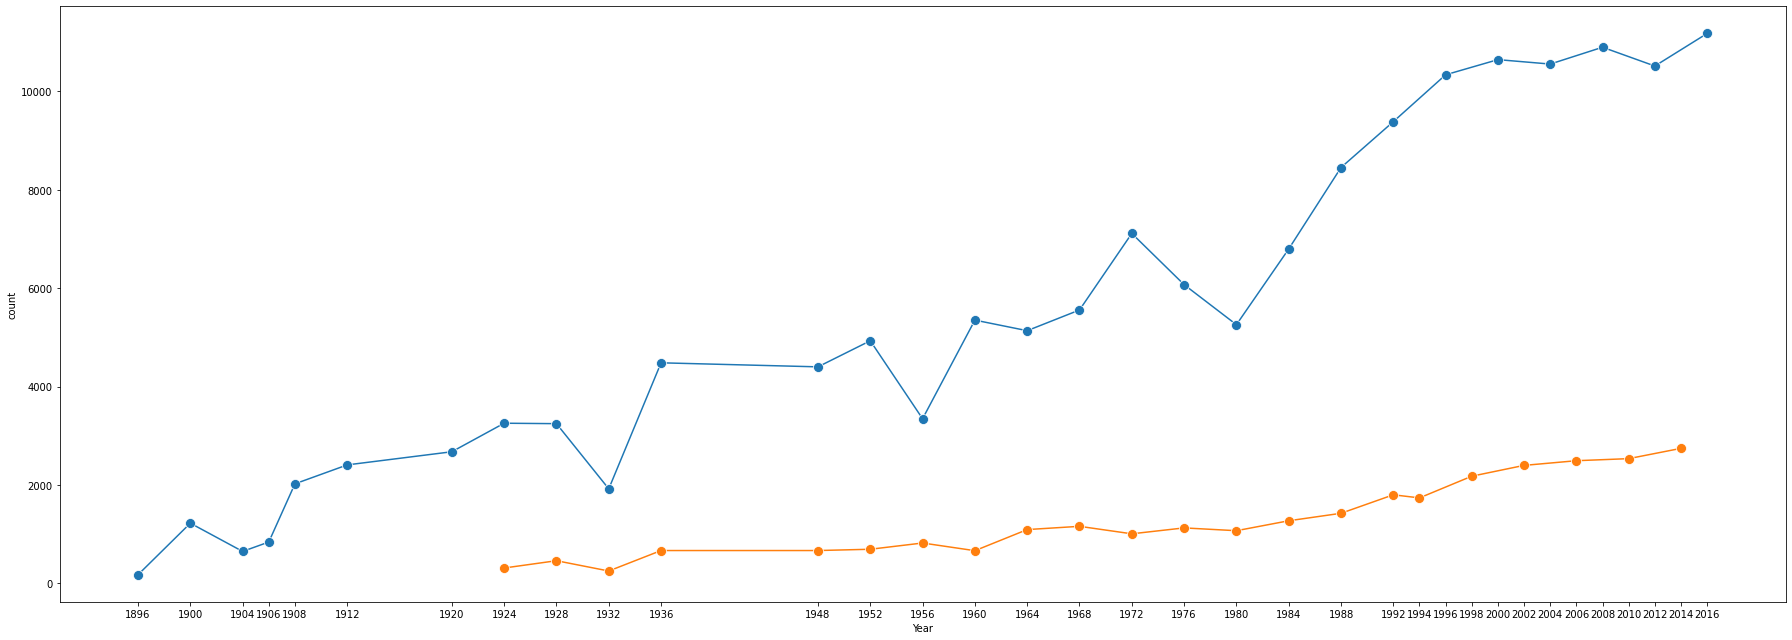

In [37]:
plt.figure(figsize=(25,9))
sns.lineplot(x=grouped['Year'],y=grouped['count'],marker='o',markersize=10)
sns.lineplot(x=groupedw['Year'],y=groupedw['count'],marker='o',markersize=10)
plt.xticks(oly.Year.unique())
plt.tight_layout()

In [38]:
grouped = summer_oly.groupby('Year')['NOC'].nunique().reset_index(name='Nation')
groupedw = winter_oly.groupby('Year')['NOC'].nunique().reset_index(name='Nation')

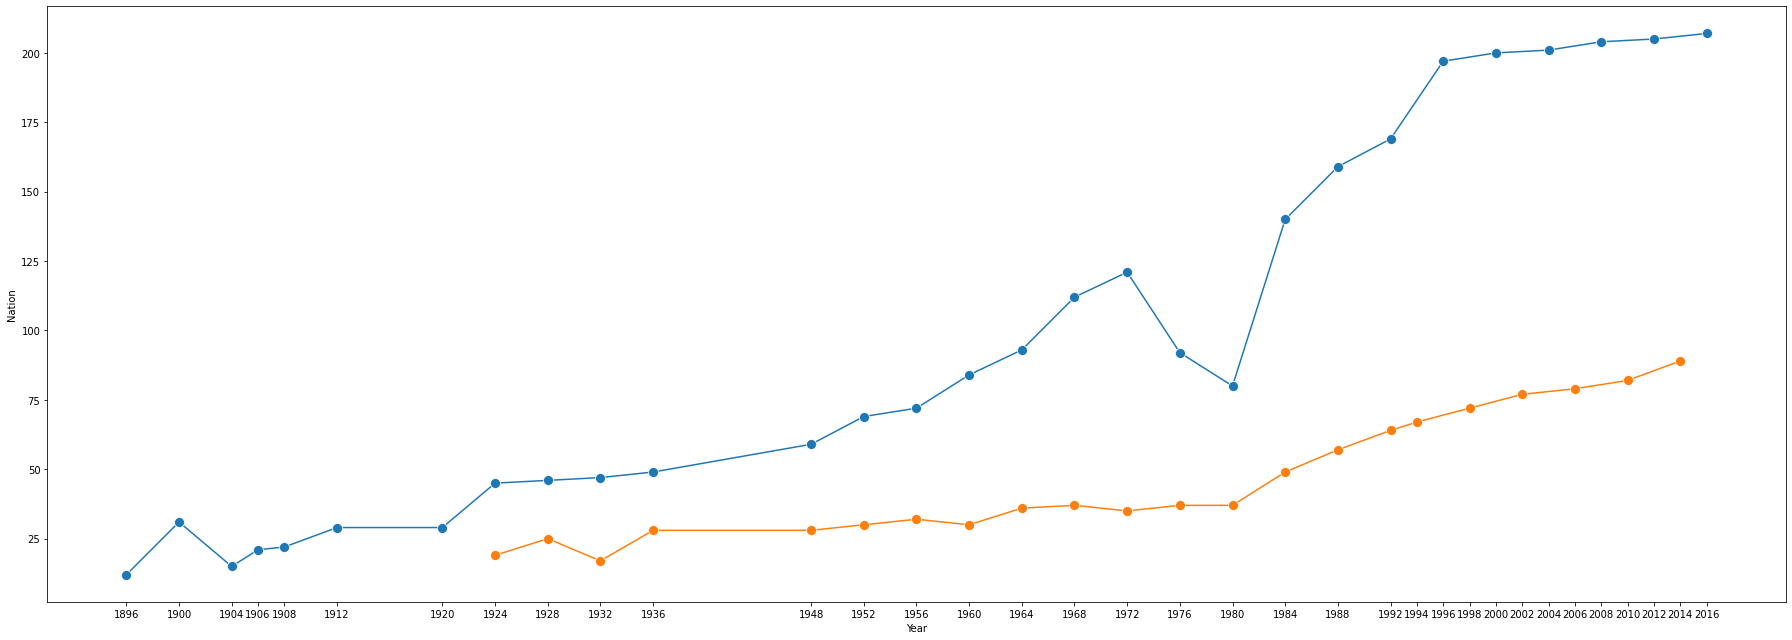

In [39]:
plt.figure(figsize=(25,9))
sns.lineplot(x=grouped['Year'],y=grouped['Nation'],marker='o',markersize=10)
sns.lineplot(x=groupedw['Year'],y=groupedw['Nation'],marker='o',markersize=10)
plt.xticks(oly.Year.unique())
plt.tight_layout()

So from these two plots, we can see some strange values which generate questions in our minds.

### Why Olympics in 1900 have a huge number of nations which participate in ?
The 1900 Olympic Games in Paris had a huge amount of participants because they were held in conjunction with the 1900 World's Fair, which attracted millions of visitors from around the world. As a result, many athletes from different countries who were already attending the World's Fair decided to compete in the Olympic events as well.

Additionally, the 1900 Olympics featured a wide range of events, including some that were not traditional athletic competitions, such as the art competitions and exhibitions, which attracted participants from various fields of arts and sciences.



---
### what's the main reason for decreasing in the number of teams at the 1906 Olympics ? 
There was no official Olympic Games held in 1906!!!!!!!

The 1906 Intercalated Games were held just two years after the 1904 Olympics, which may have made it difficult for some athletes to prepare and attend both events.

The International Olympic Committee did not officially recognize the 1906 Intercalated Games, which may have reduced the level of interest and participation from some countries and athletes.


---
### What's the reason for the interruption between 1912 and 1920?

The 1916 Olympics were scheduled to be held in Berlin, Germany, but were cancelled due to World War I, which started in 1914. The war disrupted international travel and made it difficult for countries to send athletes to compete in the games


--- 
### What's the reason for the interruption between 1936 and 1948?
There were no Olympic Games held during this period due to the effects of World War II. The 1940 Summer Olympics and Winter Olympics, which were scheduled to be held in Tokyo, Japan, and Sapporo, Japan, respectively, were cancelled due to the outbreak of World War II. The 1944 Summer Olympics and Winter Olympics, which were scheduled to be held in London, England, and Cortina d'Ampezzo, Italy, respectively, were also cancelled due to the war.

---
### What about 1960 Olympic games 
The 1960 Summer Olympics, also known as the Games of the XVII Olympiad, were held in Rome, Italy. These Olympics were notable for a few reasons.

Firstly, they were the first Olympics to be televised on a large scale, with many events broadcast live to television audiences around the world. This helped to increase the popularity and exposure of the Olympics to a wider audience.

Secondly, the 1960 Olympics were notable for a number of standout performances by athletes. Some of the most notable performances included those of Ethiopian runner Abebe Bikila, who won the marathon while running barefoot, and American boxer Cassius Clay (later known as Muhammad Ali), who won the light-heavyweight boxing gold medal.

---

### What about 1980 Olympic games?

Olympic games 1980 were held in Moscow, the capital of the Soviet Union . 

The 1980 Olympics were notable for a number of reasons. Firstly, they were the first Olympic Games to be held in a socialist country. Secondly, they were marred by controversy when the United States and many other Western countries decided to boycott the games in protest of the Soviet Union's invasion of Afghanistan in 1979.
so we can see the number of nation was decreased .

---


# Medals and recordes in Olympic 

let's see the oldest male and female who participated in the Olympics

In [40]:
fag = fem.Age.max()
mag = mal.Age.max()
fem[fem['Age']==fag]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region,Notes
201631,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,160.0,59.0,France,FRA,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN


In [41]:
mal[mal['Age']==mag]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region,Notes
257054,128719,John Quincy Adams Ward,M,97.0,175.0,76.0,United States,USA,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


We can see that they participate in art competitions which don't have any relation to body and health . 

In [42]:
gold_s = summer_oly[summer_oly['Medal']=='Gold']
gold_w = winter_oly[winter_oly['Medal']=='Gold']

Text(0.5, 1.0, 'Distribution of Summer Gold Medals')

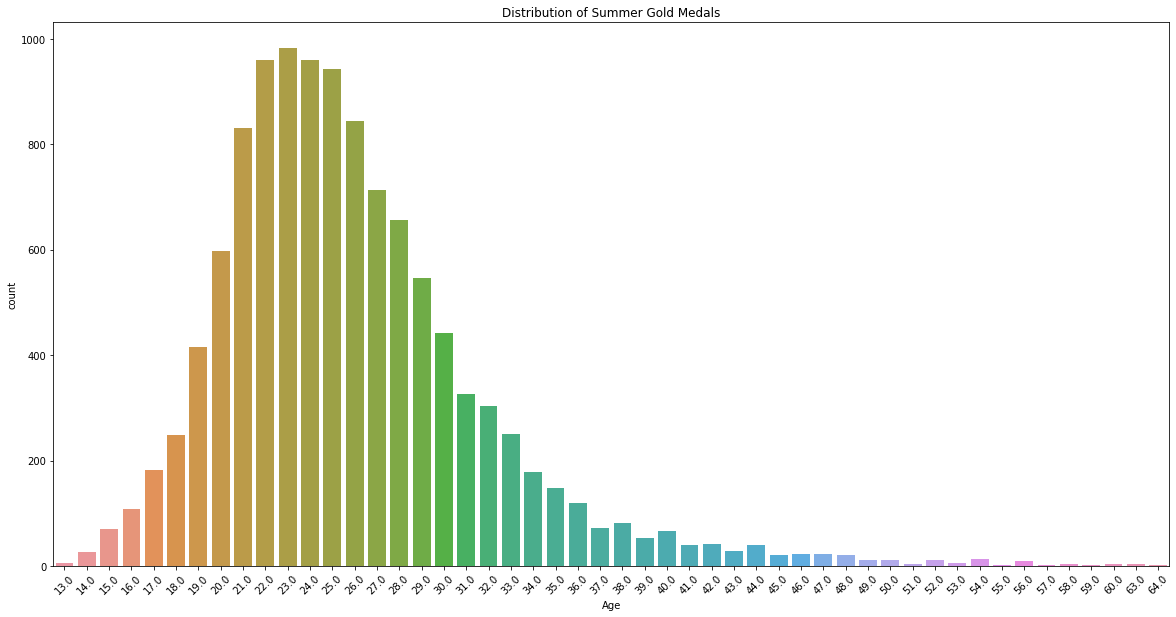

In [49]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x=gold_s.Age)
plt.xticks(rotation=45)
plt.title('Distribution of Summer Gold Medals')

Text(0.5, 1.0, 'Distribution of Winter Gold Medals')

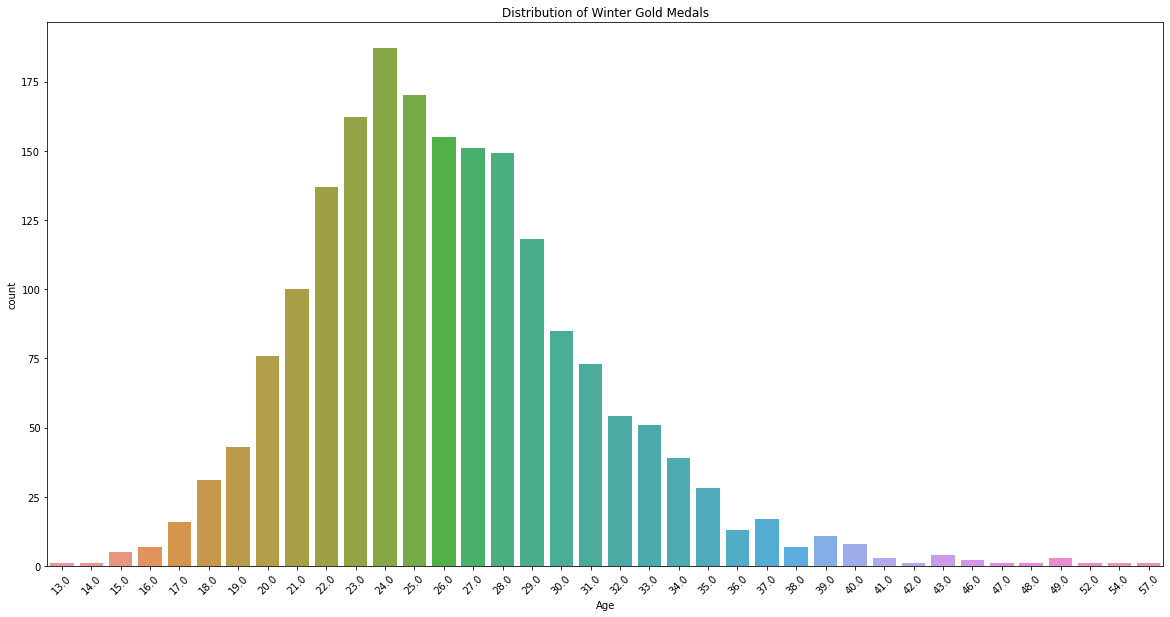

In [50]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x=gold_w.Age)
plt.xticks(rotation=45)
plt.title('Distribution of Winter Gold Medals')

So we can say that in summer games we have more old participant than winter games 

# Let's now see the medals for each country 

In [56]:
print('Top 10 Conteries in Summer olympic')
gold_s.Region.value_counts().reset_index(name='Medal').head(10)


Top 10 Conteries in Summer olympic


,index,Medal
0,USA,2472
1,Russia,1220
2,Germany,1075
3,UK,635
4,Italy,518
5,France,463
6,Hungary,432
7,Australia,362
8,Sweden,354
9,China,335


In [57]:
print('Top 10 Conteries in Winter olympic')
gold_w.Region.value_counts().reset_index(name='Medal').head(10)


Top 10 Conteries in Winter olympic


,index,Medal
0,Russia,379
1,Canada,305
2,Germany,226
3,USA,166
4,Norway,151
5,Sweden,125
6,Austria,79
7,Switzerland,76
8,Finland,66
9,Italy,57


We can see that Russia is better in the Winter game than the USA because Russia is a vast country with many regions that experience long, cold winters, which can provide ideal conditions for winter sports such as ice hockey, figure skating, skiing, and biathlon. Additionally, Russia has invested heavily in developing its winter sports infrastructure and training facilities, which can help its athletes perform at a high level.

## Let's try to see how Arabs do in the Olympic games

In [65]:
#first of all we will Creat list for Arabs NOC 
arab_nocs = ['ALG', 'BRN', 'COM', 'DJI', 'EGY', 'IRQ', 'JOR', 'KUW', 'LIB', 'LBA', 'MTN', 'MAR', 'OMA', 'PLE', 'QAT', 'KSA', 'SOM', 'SUD', 'SYR', 'TUN', 'UAE', 'YEM']
#creat a data frame for arabs only 
arab = oly[oly['NOC'].isin(arab_nocs)]

In [73]:
arab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5615 entries, 134 to 270447
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5615 non-null   int64  
 1   Name    5615 non-null   object 
 2   Sex     5615 non-null   object 
 3   Age     5615 non-null   float64
 4   Height  5615 non-null   float64
 5   Weight  5615 non-null   float64
 6   Team    5615 non-null   object 
 7   NOC     5615 non-null   object 
 8   Year    5615 non-null   int64  
 9   Season  5615 non-null   object 
 10  City    5615 non-null   object 
 11  Sport   5615 non-null   object 
 12  Event   5615 non-null   object 
 13  Medal   109 non-null    object 
 14  Region  5615 non-null   object 
 15  Notes   0 non-null      object 
dtypes: float64(3), int64(2), object(11)
memory usage: 745.7+ KB


### Let's find out which countries are the most participating in the Olympics

<Axes: xlabel='Region', ylabel='count'>

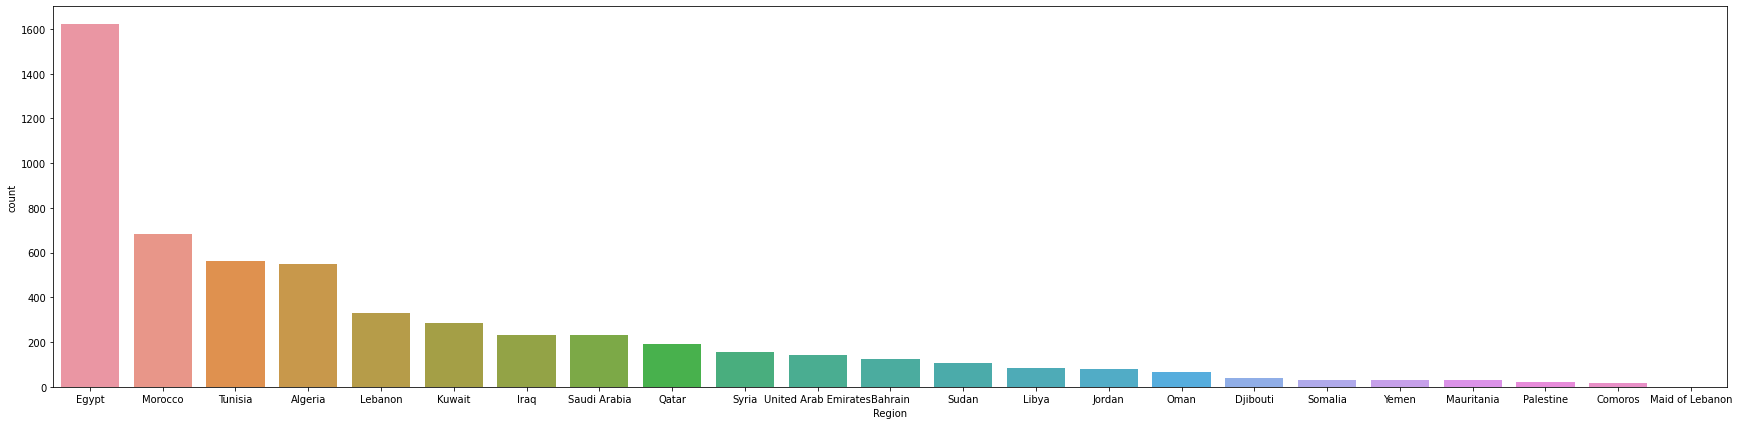

In [100]:
plt.figure(figsize=(30,7))
plt.tight_layout()
sns.countplot(data=arab,x='Region',order=arab.Team.value_counts().index)

we can see that Egypt is the most arab country that has participated in the Olympics !!!

### Let's find out which countries are the most medal earning

In [133]:
winners = arab[arab.Medal.notnull()]
print("The number of medal arabs got until 2016 = ",winners.shape[0])
print("The percentge of winning is =",winners.shape[0]/arab.shape[0])

The number of medal arabs got until 2016 =  109
The percentge of winning is = 0.019412288512911845


<Axes: xlabel='Region', ylabel='count'>

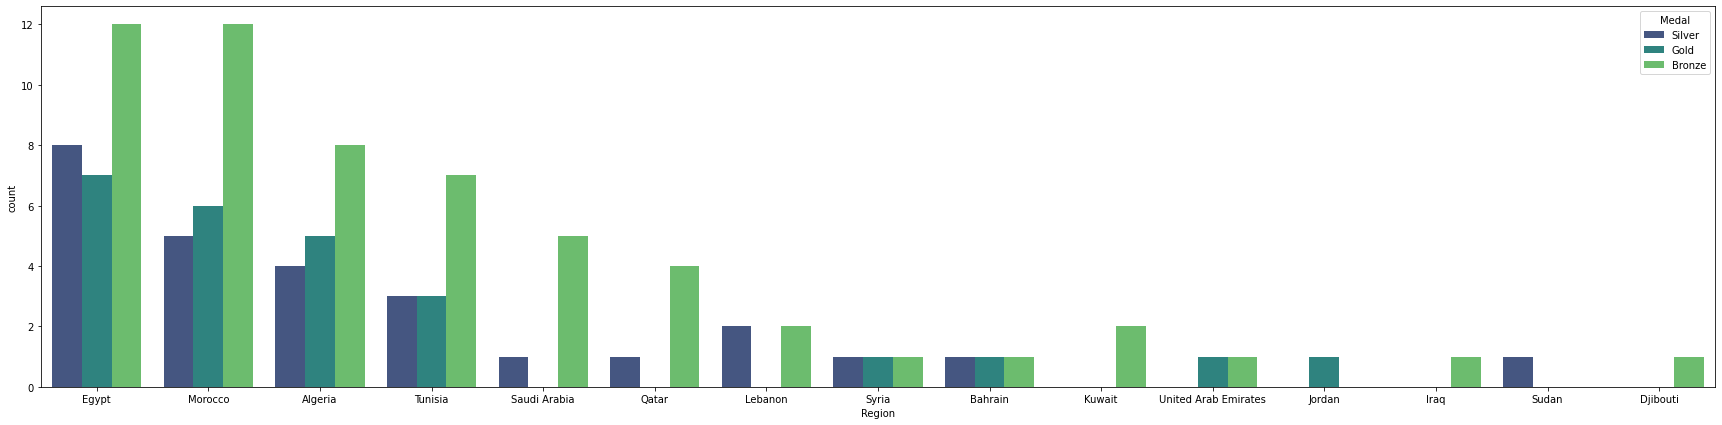

In [150]:
medal_counts = winners['Region'].value_counts().sort_values(ascending=False)
ordered_regions = medal_counts.index.tolist()
plt.figure(figsize=(30,7))
plt.tight_layout()
sns.countplot(data= winners, x='Region',hue='Medal',order=ordered_regions,palette='viridis')

Sport that arabs earn medals in !

In [151]:
winners.Sport.value_counts().reset_index(name='Medal')

,index,Medal
0,Athletics,43
1,Boxing,16
2,Weightlifting,14
3,Wrestling,11
4,Equestrianism,5
5,Judo,5
6,Taekwondo,4
7,Shooting,4
8,Swimming,3
9,Fencing,2


Gender Distribution in arabs olympic history

Text(0.5, 1.0, 'Gender Distribution at all')

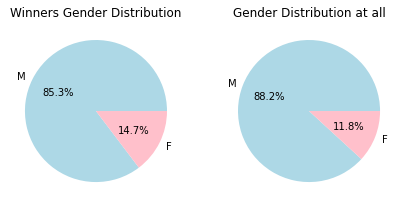

In [149]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,5))
ax1.pie(winners.Sex.value_counts(),labels=winners.Sex.value_counts().index,colors= ['lightblue', 'pink'], autopct='%1.1f%%')
ax1.set_title('Winners Gender Distribution')
ax2.pie(arab.Sex.value_counts(),labels=arab.Sex.value_counts().index,colors= ['lightblue', 'pink'], autopct='%1.1f%%')
ax2.set_title('Gender Distribution at all')

The best Year for Arabs 

<Axes: xlabel='Year', ylabel='count'>

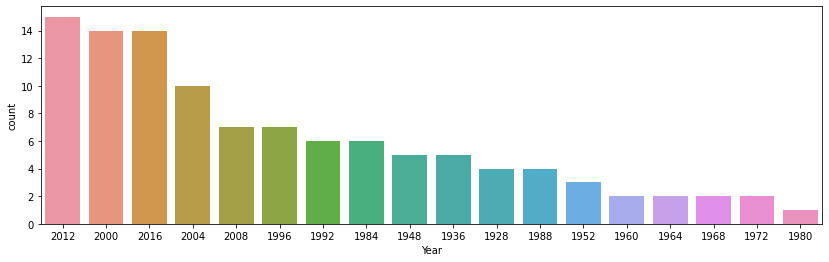

In [155]:
plt.figure(figsize=(14,4))
sns.countplot(x=winners.Year,order=winners.Year.value_counts().index)

Let's see about this Year!

In [157]:
year_spe = winners[winners['Year']==2012]

<Axes: xlabel='Region', ylabel='count'>

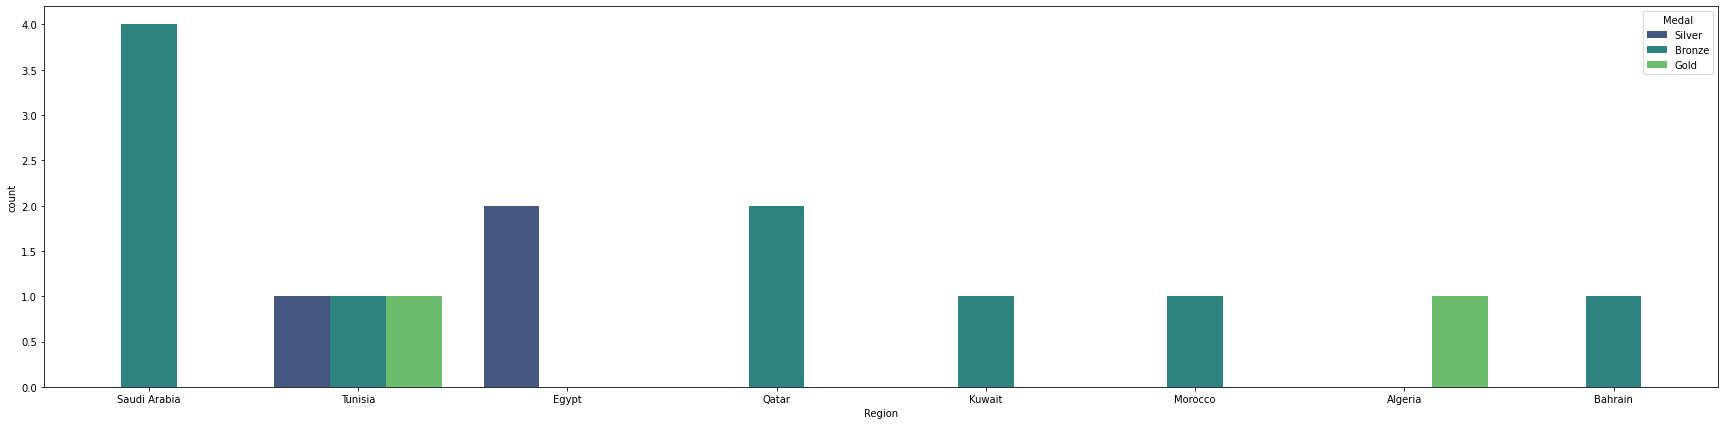

In [158]:
medal_counts = year_spe['Region'].value_counts().sort_values(ascending=False)
ordered_regions = medal_counts.index.tolist()
plt.figure(figsize=(30,7))
plt.tight_layout()
sns.countplot(data= year_spe, x='Region',hue='Medal',order=ordered_regions,palette='viridis')

we can see that Saudi Arabia get the most medals in that year and Tunisia the second one 

The first time arabs show up in the olympics 

In [162]:
m = arab.Year.min()
print('The first time arabs show up in the olympics',m)

arab[arab['Year']==m]


The first time arabs show up in the olympics 1906


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region,Notes
43632,22499,Eugenio Colombani,M,25.0,172.0,74.0,Egypt,EGY,1906,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,Egypt,NaN
43633,22499,Eugenio Colombani,M,24.0,178.0,72.0,Egypt,EGY,1906,Summer,Athina,Cycling,Cycling Men's Sprint,NaN,Egypt,NaN
43634,22499,Eugenio Colombani,M,24.0,178.0,72.0,Egypt,EGY,1906,Summer,Athina,Cycling,Cycling Men's 20 kilometres,NaN,Egypt,NaN
189649,95250,Arthur Pitt-Marson,M,25.0,180.0,71.0,Egypt,EGY,1906,Summer,Athina,Athletics,Athletics Men's 5 mile,NaN,Egypt,NaN
189650,95250,Arthur Pitt-Marson,M,25.0,180.0,71.0,Egypt,EGY,1906,Summer,Athina,Athletics,Athletics Men's Marathon,NaN,Egypt,NaN


We can see that all of them from Egypt! 

## Let's get back to our general data and see the relation between some features in the data frame

The relationship between the number of times an athlets has participated in the Olympics and the number of medals they have won

Text(0.5, 1.0, 'Medals vs. participations')

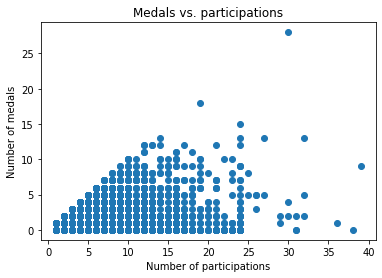

In [164]:
medal_counts = oly.groupby('ID')['Medal'].count()
participation_counts = oly.groupby('ID')['Medal'].size()
plt.scatter(participation_counts, medal_counts)
plt.xlabel('Number of participations')
plt.ylabel('Number of medals')
plt.title('Medals vs. participations')

In [165]:
corr_coeff = participation_counts.corr(medal_counts)
print('Correlation coefficient:', corr_coeff)

Correlation coefficient: 0.3576407273513645


## In conclusion,
our EDA project has provided us with valuable insights into the history of the Olympic games and how they have been influenced by various global events. We were able to identify patterns and trends in the data and draw meaningful conclusions to answer our research questions.

As with any project, there is always room for improvement. In the future, we plan to expand our analysis by incorporating additional data sources, exploring new research questions, and leveraging more advanced analytical techniques. We also plan to improve the presentation and visualization of our findings, potentially by creating a report using Power BI.

Overall, our EDA project has demonstrated the power of data analysis in uncovering insights and informing decision-making. We hope that our findings will contribute to a deeper understanding of the history and evolution of the Olympic games, and provide a basis for future research in this area.